Dataset 1

In [1]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import recall_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
x_values=[]
k=10
while (k<=100):
  x_values.append(k)
  k+=10


recall_values=[]
precision_at_5_values=[]
precision_at_10_values=[]
roc_auc_values=[]

In [3]:
def getResult(X,y):
  k=10
  recall_values.clear();
  precision_at_5_values.clear();
  precision_at_10_values.clear();
  roc_auc_values.clear();

  while (k<=100):
    lof_model = LocalOutlierFactor(n_neighbors=k)
    y_pred = lof_model.fit_predict(X.values)
    recall = recall_score(y, y_pred, pos_label=-1)  # Assuming -1 is the label for outliers
    recall_values.append(recall)

    fpr, tpr, thresholds = roc_curve(y, -lof_model.negative_outlier_factor_, pos_label=-1)
    roc_auc = auc(fpr, tpr)
    roc_auc_values.append(roc_auc)


    lof_model = LocalOutlierFactor(n_neighbors=k,contamination=5/y.size)
    y_pred = lof_model.fit_predict(X.values)
    cnt = 0
    for actual, predicted in zip(y, y_pred):
      if actual == -1 and predicted == -1:
          cnt += 1
    precision_at_5_values.append(cnt/5)

    lof_model = LocalOutlierFactor(n_neighbors=k,contamination=10/y.size)
    y_pred = lof_model.fit_predict(X.values)
    cnt = 0
    for actual, predicted in zip(y, y_pred):
      if actual == -1 and predicted == -1:
          cnt += 1
    precision_at_10_values.append(cnt/10)

    k+=10

  plotFigure()




In [4]:
def plotFigure():
  plt.plot(x_values, recall_values, label='Recall', color='blue')
  plt.plot(x_values, precision_at_5_values, label='Precision@N=5', color='green')
  plt.plot(x_values, precision_at_10_values, label='Precision@N=10', color='red')
  plt.plot(x_values, roc_auc_values, label='ROC Area Under Curve', color='yellow')

  # Adding labels and legend
  plt.xlabel('Number of nearest neighbours')
  plt.ylabel('Value of performance metric')
  plt.title('Variations in LOF algorithm with no of nearest neighbours')
  plt.legend(loc='lower right', fontsize='small')

  # Show the plot
  plt.show()

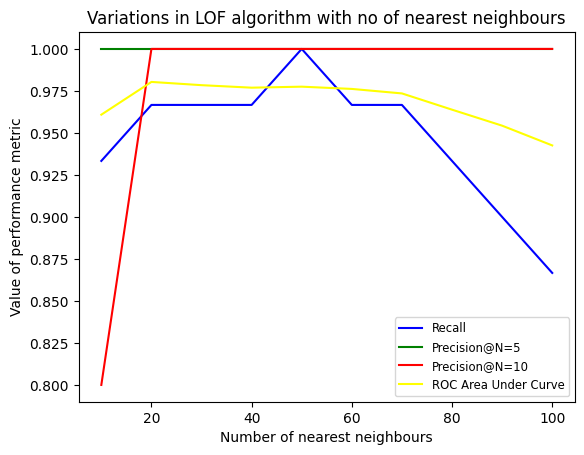

In [5]:
data=pd.read_csv("ionosphere.csv")
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
getResult(X,y)

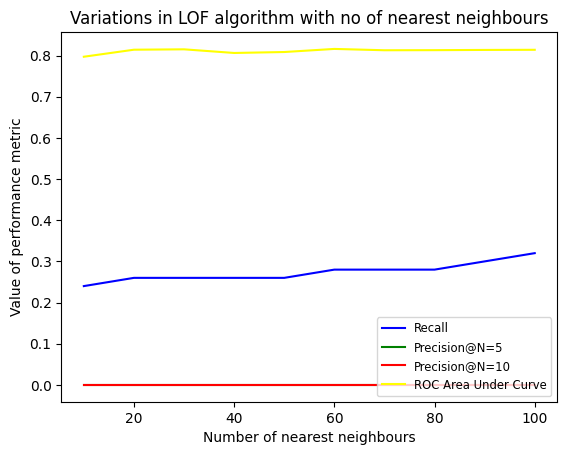

In [6]:
data=pd.read_csv("mammography.csv")
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
getResult(X,y)

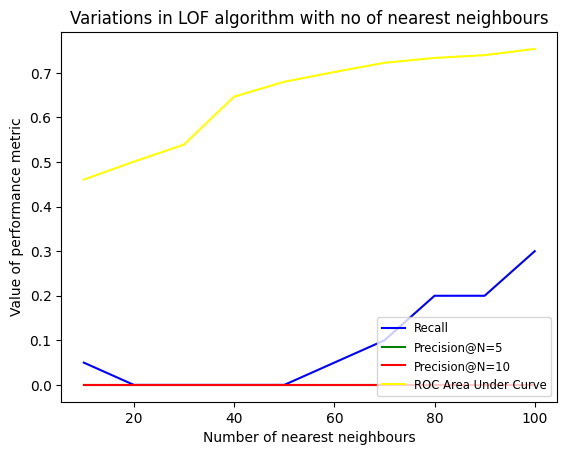

In [7]:
data=pd.read_csv("wine.csv")
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
getResult(X,y)

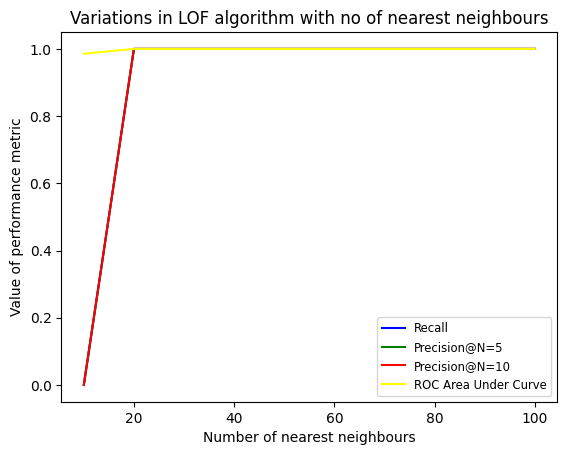

In [8]:
data=pd.read_csv("musk.csv")
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
getResult(X,y)

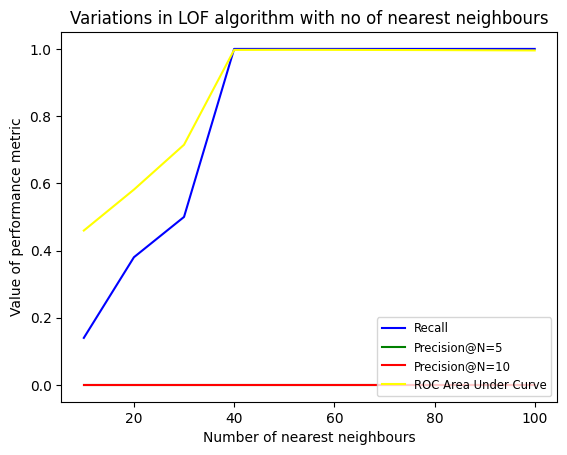

In [9]:
data=pd.read_csv("shuttle.csv")
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
getResult(X,y)